<a href="https://colab.research.google.com/github/EverHernandez01/Senales_y-_Sistemas_2025_S2/blob/main/Taller_Laplace/5_Red_Electrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caracterizacion SLITs en el dominio del tiempo

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Análisis de redes eléctricas con elementos Pasivos

- Las [redes eléctricas](https://en.wikipedia.org/wiki/Electrical_network) compuestos de elementos pasivos lineales, como resistencias, condensadores e inductores, pueden describirse mediante ecuaciones diferenciales ordinarias lineales (EDO) con coeficientes constantes.

- Por lo tanto, visto desde la teoría de las señales y los sistemas, pueden interpretarse como un sistema lineal invariante en el tiempo (SLIT).

- Las diferentes formas de caracterizar las propiedades de un SLIT introducidas anteriormente se ilustran con un circuito RLC serie:

![Filtro pasa bajas analógico de segundo orden](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/lowpass.png?raw=1)


- Se asume que no se almacena energía en el condensador ni en el inductor para $t<0$. Además, se supone que $x(t)=0$ para $t<0$.

- Por lo tanto, $y(t)=0$ y $\frac{d y(t)}{dt}=0$ para $ t<0$. Para ilustrar, se utilizan los valores de $L=0.5$, $R=1$, $C=0.4$ como los parámetros de la red eléctrica.

#Solución del ejercicio:
R = 1 kΩ

L = 180 mH

C = 120 𝜇F

### Ecuación Diferencial

La ecuación diferencial que describe la relación entrada/salida en el circuito se obtiene al aplicar las [leyes de Kirchhoff](https://en.wikipedia.org/wiki/Kirchhoff's_circuit_laws). Así, se obtiene la siguiente EDO

\begin{equation}
C L \frac{d^2 y(t)}{dt^2} + C R \frac{d y(t)}{dt} + y(t) = x(t)
\end{equation}

Se define la EDO con `SymPy`

In [8]:
%matplotlib inline
import sympy as sym
sym.init_printing()
#se definen variables simbólicas y EDO
t, L, R, C = sym.symbols('t L R C', real=True)

x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(L*C*y.diff(t, 2) + R*C*y.diff(t) + y, x)
ode

     2                                    
    d               d                     
C⋅L⋅───(y(t)) + C⋅R⋅──(y(t)) + y(t) = x(t)
      2             dt                    
    dt                                    

Se guardan los valores de los parámetros (R, L y C) en un diccionario, para su posterior sustitución

In [9]:
RLC = {R: 1000, L: sym.Rational('.180'), C: sym.Rational('.00012')}
RLC

{C: 3/25000, L: 9/50, R: 1000}

### Función de Transferencia

Para una señal de entrada exponencial $x(t)=e^{st}$, la función de transferencia $H(s)$ representa el peso de la señal exponencial de salida $y(t)=H(s)\cdot e^{st}$.

La función de transferencia se obtiene introduciendo $x(t)$ y $y(t)$ en la EDO y resolviendo para $H(s)$:

In [10]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

        1         
──────────────────
     2            
C⋅L⋅s  + C⋅R⋅s + 1

Las características de transferencia de un SLIT para señales exponenciales armónicas $e^{j \omega t}=\cos(\omega t) + j\sin (\omega t)$ son de especial interés en el análisis de circuitos eléctricos.

Se puede obtener de $H(s)$ sustituyendo la frecuencia compleja $s$ por $s=j\omega$.

La función de transferencia resultante $H(j\omega)$ proporciona la atenuación y la fase que el sistema agrega a una señal de entrada armónica (comunmente conocido como [diagrama de Bode](https://en.wikipedia.org/wiki/Bode_plot)).

In [24]:
#se sustituye s por jm
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

          1           
──────────────────────
       2              
- C⋅L⋅ω  + ⅈ⋅C⋅R⋅ω + 1

Se grafica la magnitud de la función de transferencia  |H(jω)|  para los valores de  R ,  L  y  C  definidos anteriormente en el diccionario.

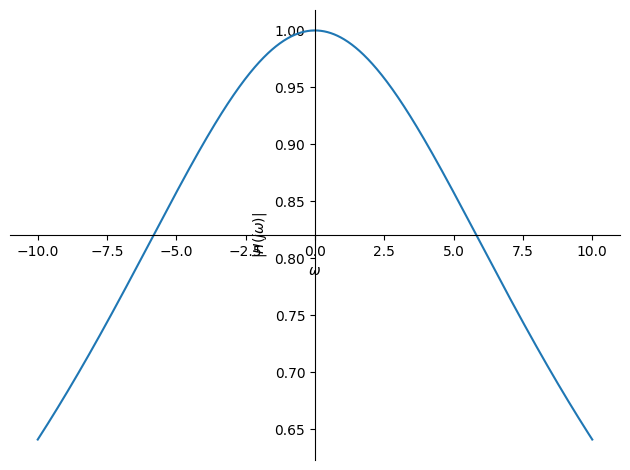

In [27]:
sym.plot(abs(Hjw.subs(RLC)), (w, -10, 10), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

Ahora, resulta obvio que las frecuencias bajas pasan a través del sistema y que las frecuencias altas se atenúan. Esto motiva el término 'pasa bajas' para tales sistemas.

Como alternativa a la solución de la EDO, la función de transferencia  H(s)  se calcula a partir de la respuesta de impulso y se grafica para los valores especificados anteriormente de los parámetros.

In [28]:
H2 = sym.integrate(h.rhs.subs(RLC)*sym.exp(-s*t), (t,0,sym.oo), conds='none')
H2.simplify()

         1250000          
──────────────────────────
    2                     
27⋅s  + 150000⋅s + 1250000

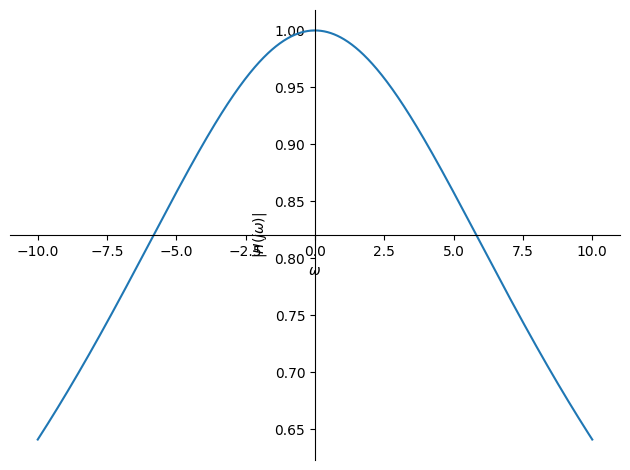

In [29]:
sym.plot(abs(H2.subs(s, sym.I*w)), (w, -10, 10), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

La fase de la función de transferencia $\varphi (j\omega)=\arg \{H(j\omega)\}$ proporciona información sobre la fase agregada a una señal armónica cuando pasa a través del sistema. Se calcula y grafica para los valores específicos de los elementos dados anteriormente.

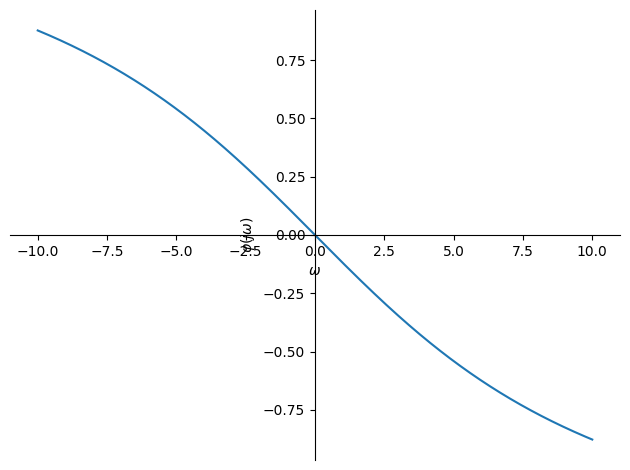

In [30]:
phi = sym.arg(Hjw)
sym.plot(phi.subs(RLC), (w, -10, 10), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');

###Diagrama de Bode

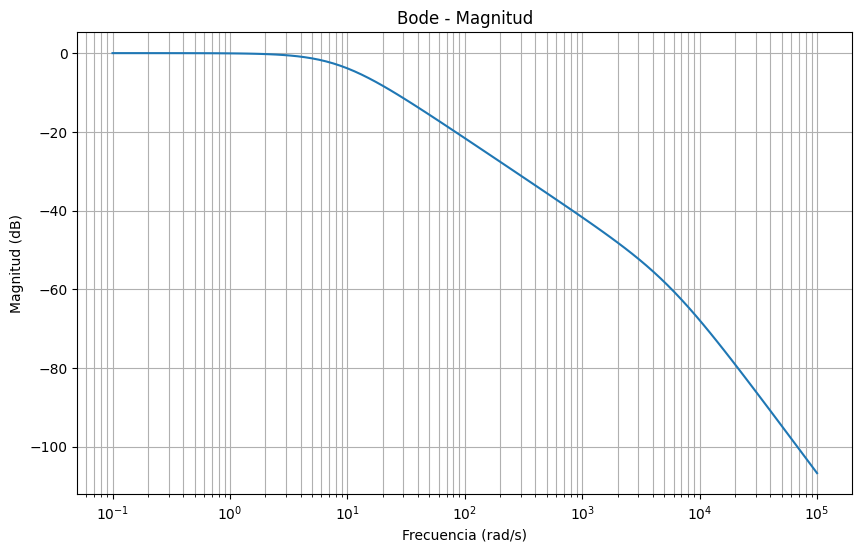

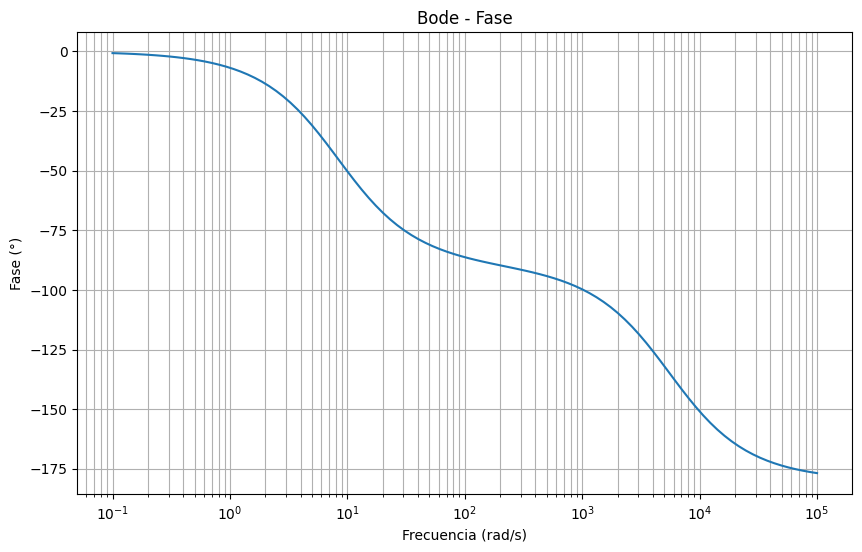

In [11]:
!pip install numpy scipy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

L = 0.18
C = 0.00012
R = 1000

num = [1]
den = [L*C, R*C, 1]

system = signal.TransferFunction(num, den)
w, mag, phase = signal.bode(system)

plt.figure(figsize=(10,6))
plt.semilogx(w, mag)
plt.title("Bode - Magnitud")
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Magnitud (dB)")
plt.grid(True, which="both")

plt.figure(figsize=(10,6))
plt.semilogx(w, phase)
plt.title("Bode - Fase")
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Fase (°)")
plt.grid(True, which="both")

plt.show()

## Diagrama de polos y ceros

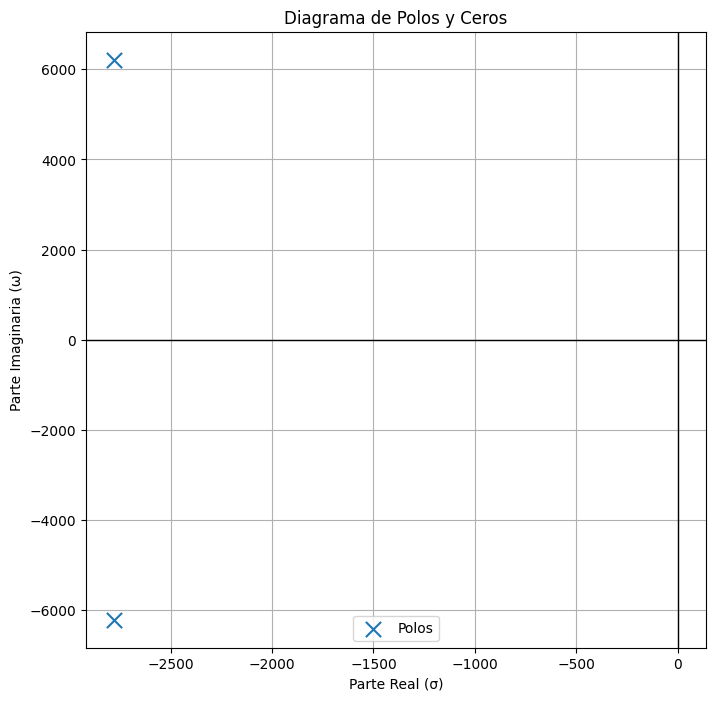

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Polos de el ejercicio
p1 = -2777.7778 + 6211.2999j
p2 = -2777.7778 - 6211.2999j

poles = np.array([p1, p2])

# No hay ceros en este sistema
zeros = np.array([])

plt.figure(figsize=(8,8))

# Graficar polos
plt.scatter(np.real(poles), np.imag(poles), marker='x', s=120, label='Polos')

# Graficar ceros
if len(zeros) > 0:
    plt.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none', edgecolors='b', s=120, label='Ceros')

# Ejes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

plt.title("Diagrama de Polos y Ceros")
plt.xlabel("Parte Real (σ)")
plt.ylabel("Parte Imaginaria (ω)")
plt.grid(True, which='both')
plt.legend()
plt.show()

### Respuesta al Impulso


La red eléctrica pasiva y la EDO que describen su relación de entrada/salida se pueden interpretar como un SLIT. Por lo tanto, el sistema puede caracterizarse por su respuesta al impulso $h(t)$ que se define como la salida del sistema ante una entrada impulso de Dirac $x(t) = \delta(t)$.

Para el sistema dado, la respuesta al impulso se calcula al resolver la EDO

In [12]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

                                                                               ↪
             ⎛        ________________⎞          ⎛       ________________⎞     ↪
             ⎜       ╱   ⎛   2      ⎞ ⎟          ⎜      ╱   ⎛   2      ⎞ ⎟     ↪
             ⎜     ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟          ⎜    ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟     ↪
           t⋅⎜-R + ───────────────────⎟       -t⋅⎜R + ───────────────────⎟     ↪
             ⎝              C         ⎠          ⎝             C         ⎠     ↪
           ────────────────────────────       ─────────────────────────────    ↪
                       2⋅L                                 2⋅L                 ↪
h(t) = C₁⋅ℯ                             + C₂⋅ℯ                              +  ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪

↪    ⎛        _____________

Las constantes de integración $C_1$ y $C_2$ deben determinarse a partir de las condiciones iniciales $y(t)=0$ y $\frac{d y(t)}{dt}=0$ para $t<0$.

In [13]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

{C₁: 0, C₂: 0}

La sustitución de los valores de las constantes de integración $C_1$ y $C_2$ en el resultado anterior produce la respuesta al impulso:

In [14]:
h = solution_h.subs(integration_constants)
h

          ⎛        ________________⎞            ⎛       ________________⎞      
          ⎜       ╱   ⎛   2      ⎞ ⎟            ⎜      ╱   ⎛   2      ⎞ ⎟      
          ⎜     ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟            ⎜    ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟      
        t⋅⎜-R + ───────────────────⎟         -t⋅⎜R + ───────────────────⎟      
          ⎝              C         ⎠            ⎝             C         ⎠      
        ────────────────────────────         ─────────────────────────────     
                    2⋅L                                   2⋅L                  
       ℯ                            ⋅θ(t)   ℯ                             ⋅θ(t)
h(t) = ────────────────────────────────── - ───────────────────────────────────
                 ________________                      ________________        
                ╱   ⎛   2      ⎞                      ╱   ⎛   2      ⎞         
              ╲╱  C⋅⎝C⋅R  - 4⋅L⎠                    ╲╱  C⋅⎝C⋅R  - 4⋅L⎠         

Se grafica la respuesta al impulso para los valores $R$, $L$ y $C$ definidos anteriormente en el diccionario

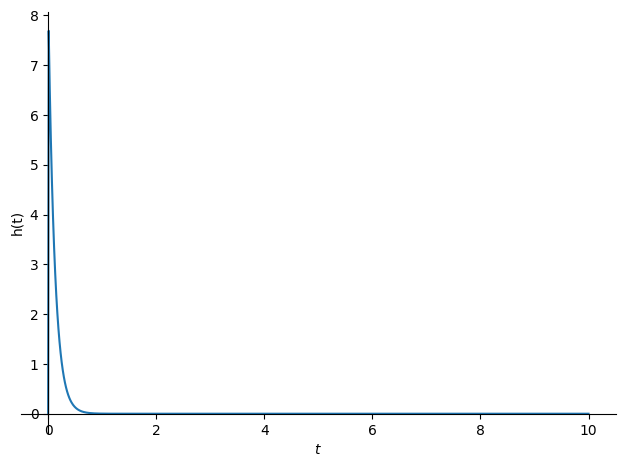

In [15]:
sym.plot(h.rhs.subs(RLC), (t,0,10), ylabel=r'h(t)');

### Respuesta al Escalón

La respuesta al escalón se obtiene al integrar la respuesta al impulso $h(t)$. Para facilitar la ilustración, esto se realiza con los valores de los parámetros definidos anteriormente.

In [25]:
tau = sym.symbols('tau', real=True)

he = sym.integrate(h.rhs.subs(RLC).subs(t,tau), (tau,0,t))
he

          ⎛   25⋅t⋅(-1000 + 20⋅√2485)                     ⎞                  ⎛ ↪
          ⎜   ───────────────────────                     ⎟                  ⎜ ↪
          ⎜              9                                ⎟                  ⎜ ↪
          ⎜9⋅ℯ                                  9         ⎟                  ⎜ ↪
250⋅√2485⋅⎜────────────────────────── - ──────────────────⎟⋅θ(t)   250⋅√2485⋅⎜ ↪
          ⎝    -25000 + 500⋅√2485       -25000 + 500⋅√2485⎠                  ⎝ ↪
──────────────────────────────────────────────────────────────── - ─────────── ↪
                              1491                                             ↪

↪                        -25⋅t⋅(20⋅√2485 + 1000) ⎞     
↪                        ────────────────────────⎟     
↪                                   9            ⎟     
↪         9           9⋅ℯ                        ⎟     
↪ ───────────────── - ───────────────────────────⎟⋅θ(t)
↪ 500⋅√2485 + 25000        500⋅√2485 + 25000     ⎠     
↪ ─────────────

Ahora, se grafica la respuesta al escalón

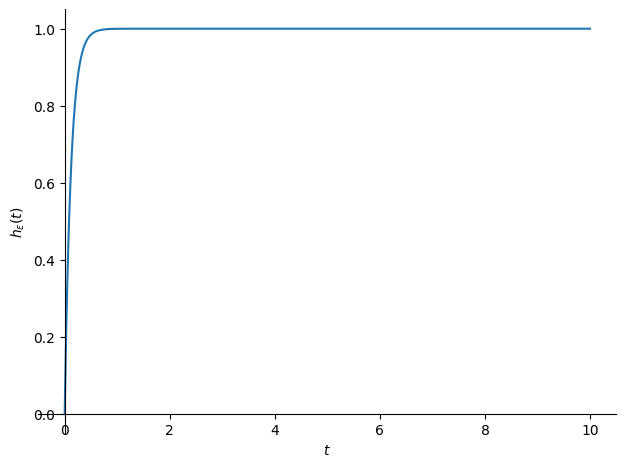

In [26]:
sym.plot(he, (t,0,10), ylabel=r'$h_\epsilon(t)$');